In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Reading the data
startups = pd.read_csv("50_Startups.csv")
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Exploratory Data Analysis

In [3]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.8+ KB


In [4]:
#check for missing values
startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### Rename the columns

In [5]:
data_cleaned=startups.rename({'R&D Spend': 'RD_Spend','Marketing Spend':'Marketing_Spend'}, axis=1)

In [6]:
data_cleaned.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Data type conversion

In [7]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.8+ KB


In [8]:
data_cleaned['State']=data_cleaned['State'].astype('category')         
data_cleaned.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
data_cleaned.describe()

,RD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Duplicates

In [10]:
#Count of duplicated rows
data_cleaned[data_cleaned.duplicated()].shape

(0, 5)

In [11]:
#Print the duplicated rows
data_cleaned[data_cleaned.duplicated()]

,RD_Spend,Administration,Marketing_Spend,State,Profit


### Outlier Detection

<AxesSubplot:>

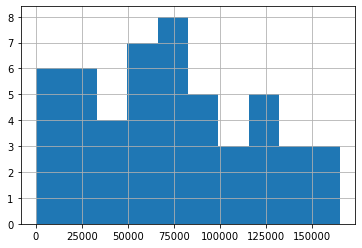

In [12]:
# histogram of RD_Spend
data_cleaned['RD_Spend'].hist()

<AxesSubplot:>

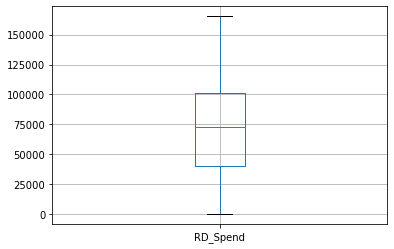

In [13]:
#Box plot
data_cleaned.boxplot(column=['RD_Spend'])

<AxesSubplot:>

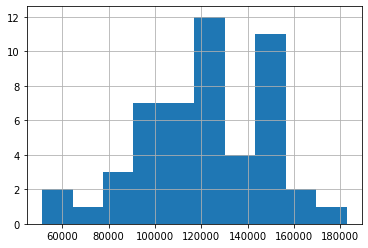

In [14]:
# histogram of Administration
data_cleaned['Administration'].hist()

<AxesSubplot:>

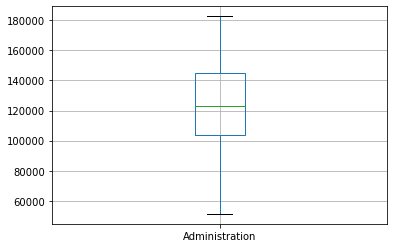

In [15]:
#Box plot
data_cleaned.boxplot(column=['Administration'])

<AxesSubplot:>

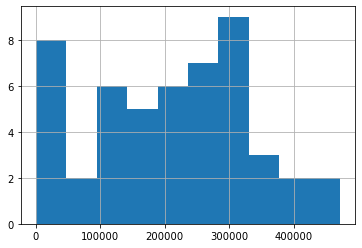

In [16]:
# histogram of Marketing_Spend
data_cleaned['Marketing_Spend'].hist()

<AxesSubplot:>

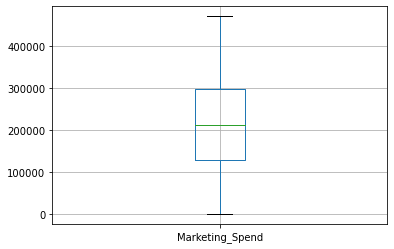

In [17]:
#Box plot
data_cleaned.boxplot(column=['Marketing_Spend'])

<AxesSubplot:>

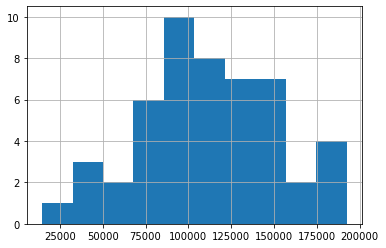

In [18]:
# histogram of Profit
data_cleaned['Profit'].hist()

<AxesSubplot:>

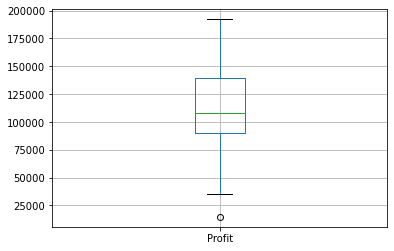

In [19]:
#Box plot
data_cleaned.boxplot(column=['Profit'])

### Missing Values and Imputation

<AxesSubplot:>

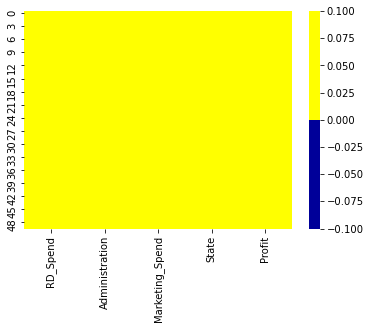

In [20]:
import seaborn as sns
cols = data_cleaned.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(data_cleaned[cols].isnull(),
            cmap=sns.color_palette(colours))

### Label Encoder

In [21]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [22]:
labelencoder = LabelEncoder()
data_cleaned.iloc[:, 3] = labelencoder.fit_transform(data_cleaned.iloc[:,3])

### Correlation Matrixs

In [23]:
data_cleaned.corr()

,RD_Spend,Administration,Marketing_Spend,State,Profit
RD_Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


### Scatterplot between variables along with histograms

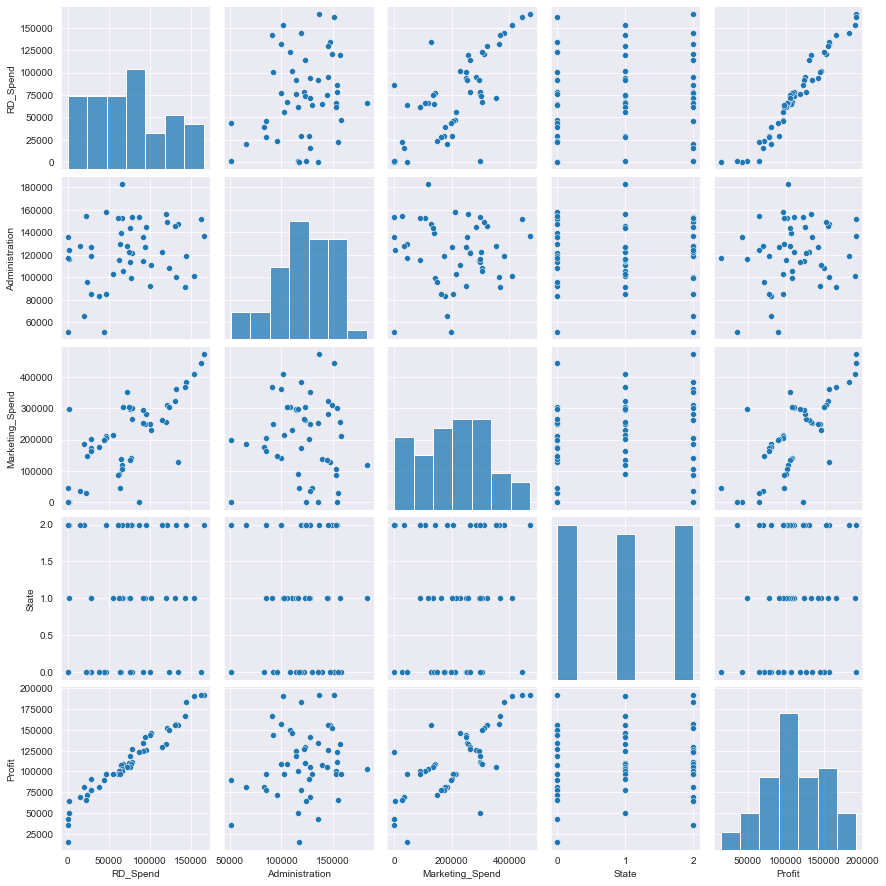

In [24]:
sns.set_style(style='darkgrid')
sns.pairplot(data_cleaned)

In [25]:
data_cleaned.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


## Preparing a model

In [26]:
import statsmodels.formula.api as smf 
model_1 = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State',data=data_cleaned).fit()

In [27]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           8.51e-29
Time:                        20:44:23   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
RD_Spend            0.8058      0.046     17.609      0.000       0.714       0.898
Administration     -0.0268      0.052     -0.520      0.606      -0.131       0.077
Marketing_Spend     0.0272      0.017      1.637      0.109      -0.006       0.061
State             -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
#Coefficients
model_1.params

Intercept          50142.506443
RD_Spend               0.805760
Administration        -0.026826
Marketing_Spend        0.027228
State                -22.320577
dtype: float64

In [29]:
#t and p-Values
print(model_1.tvalues, '\n', model_1.pvalues)

Intercept           7.368962
RD_Spend           17.608621
Administration     -0.519906
Marketing_Spend     1.636966
State              -0.013865
dtype: float64 
 Intercept          2.900008e-09
RD_Spend           8.249206e-22
Administration     6.056771e-01
Marketing_Spend    1.086131e-01
State              9.889988e-01
dtype: float64


In [30]:
#R squared values
(model_1.rsquared,model_1.rsquared_adj)

(0.9507462044842656, 0.9463680893273114)

## Simple Linear Regression Models

In [31]:
ml_a=smf.ols('Profit~Administration',data = data_cleaned).fit()  
print(ml_a.pvalues)  

Intercept         0.003824
Administration    0.162217
dtype: float64


In [32]:
ml_m=smf.ols('Profit~Marketing_Spend',data = data_cleaned).fit()  
print(ml_m.pvalues)

Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


In [33]:
ml_s=smf.ols('Profit~State',data = data_cleaned).fit()  
print(ml_s.pvalues)

Intercept    6.485443e-16
State        4.817858e-01
dtype: float64


In [34]:
ml_ams=smf.ols('Profit~Administration+Marketing_Spend+State',data = data_cleaned).fit()  
print(ml_ams.pvalues)  

Intercept          3.137147e-01
Administration     1.860240e-02
Marketing_Spend    1.777616e-10
State              6.606341e-01
dtype: float64


In [35]:
ml_as=smf.ols('Profit~Administration+State',data = data_cleaned).fit()  
print(ml_as.pvalues) 

Intercept         0.008382
Administration    0.167030
State             0.487751
dtype: float64


## Calculating VIF

In [36]:
rsq_1 = smf.ols('RD_Spend~Administration+Marketing_Spend+State',data=data_cleaned).fit().rsquared  
vif_RD_Spend = 1/(1-rsq_1) 

rsq_2 = smf.ols('Administration~RD_Spend+Marketing_Spend+State',data=data_cleaned).fit().rsquared  
vif_Administration = 1/(1-rsq_2) 

rsq_3 = smf.ols('Marketing_Spend~RD_Spend+Administration+State',data=data_cleaned).fit().rsquared  
vif_Marketing_Spend = 1/(1-rsq_3) 

rsq_4 = smf.ols('State~RD_Spend+Administration+Marketing_Spend',data=data_cleaned).fit().rsquared  
vif_State = 1/(1-rsq_4) 

d1 = {'Variables':['RD_Spend','Administration','Marketing_Spend','State'],'VIF':[vif_RD_Spend,vif_Administration,vif_Marketing_Spend,vif_State]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RD_Spend,2.481178
1,Administration,1.175315
2,Marketing_Spend,2.326780
3,State,1.011281


## Residual Analysis

### Test for Normality of Residuals (Q-Q Plot)

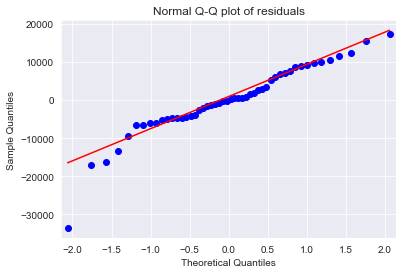

In [37]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [38]:
(np.argmax(model_1.resid),np.max(model_1.resid))

(45, 17300.941187011602)

### Residual Plot for Homoscedasticity

In [39]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

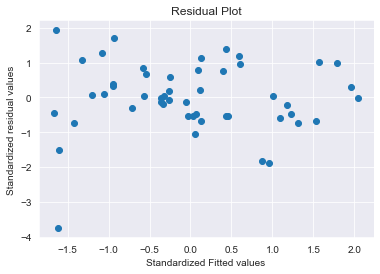

In [40]:
plt.scatter(get_standardized_values(model_1.fittedvalues),
            get_standardized_values(model_1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Residual Vs Regressors

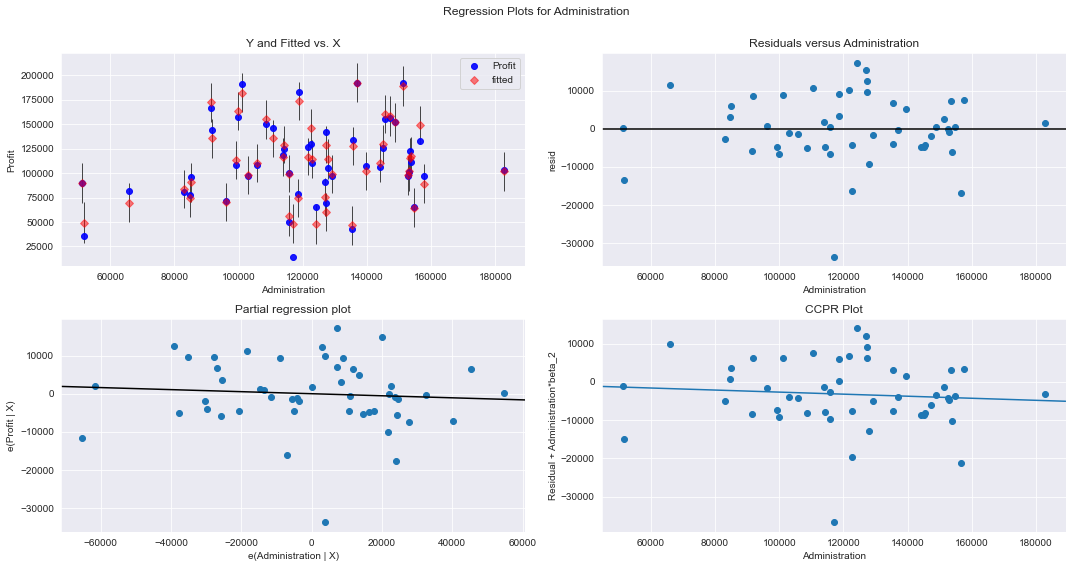

In [41]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "Administration", fig=fig)
plt.show()

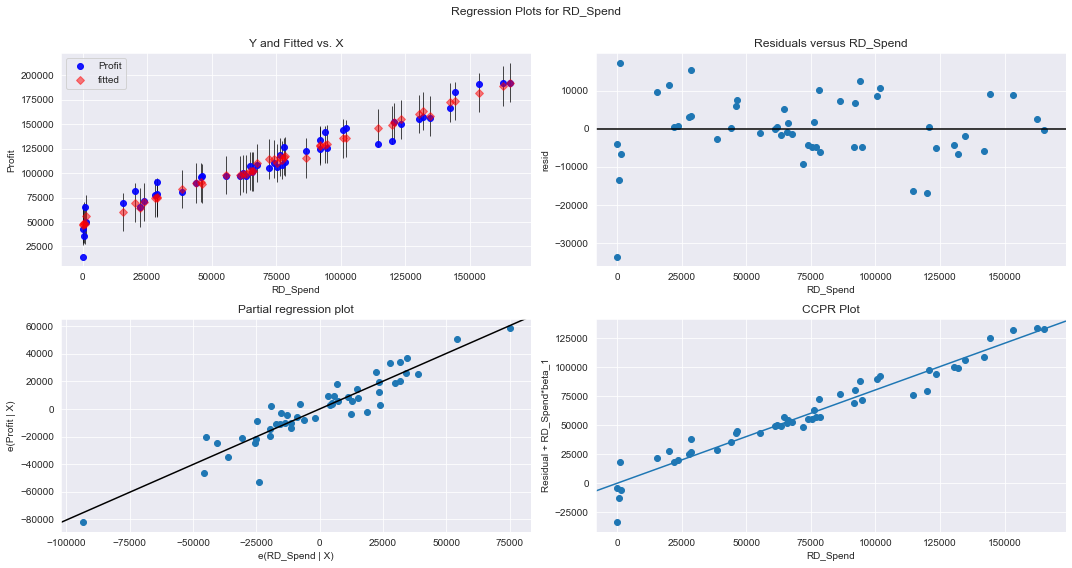

In [42]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "RD_Spend", fig=fig)
plt.show()

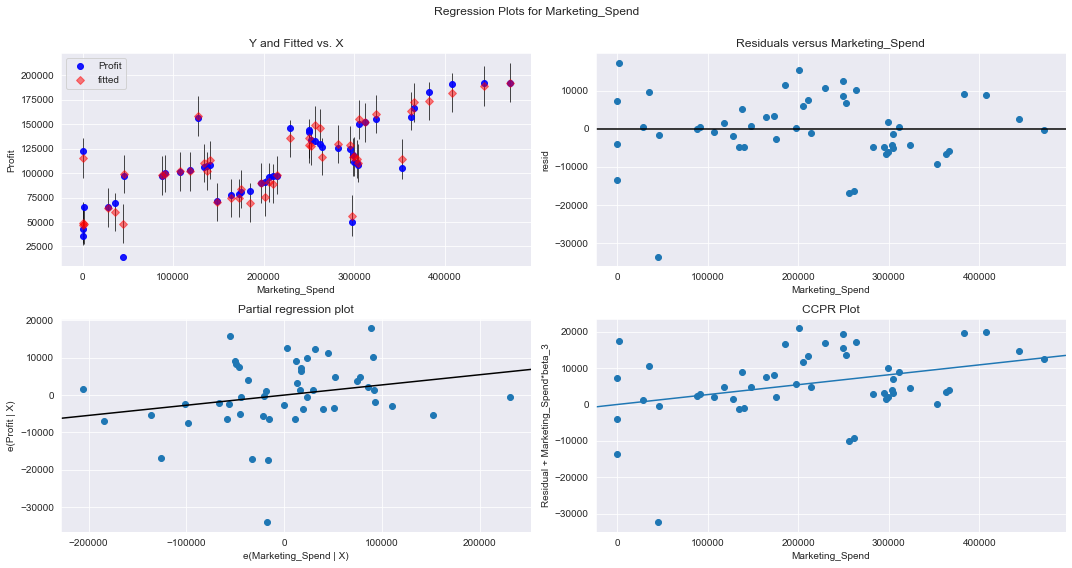

In [43]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "Marketing_Spend", fig=fig)
plt.show()

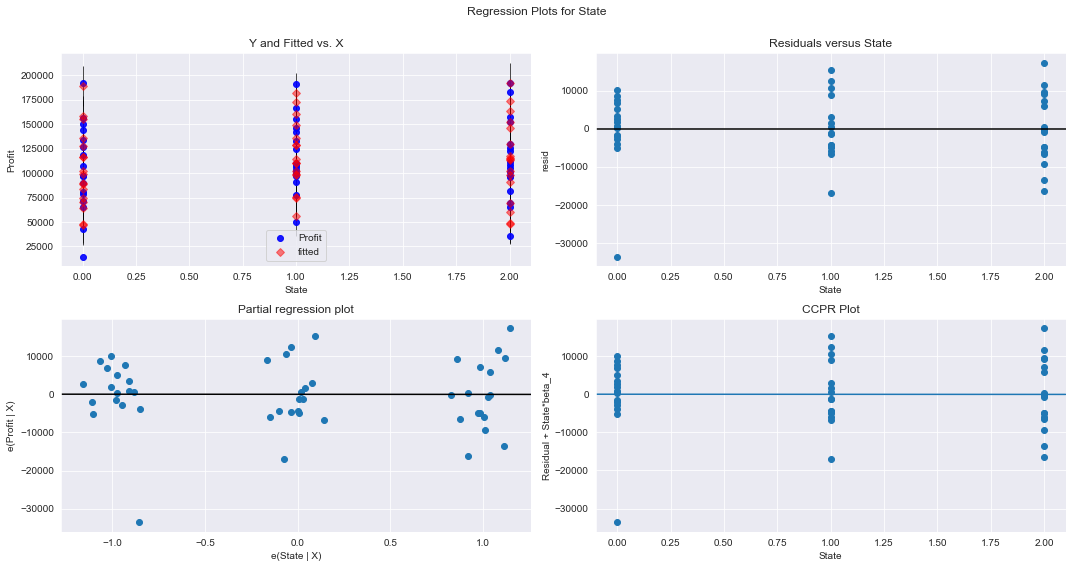

In [44]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "State", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

### Cook’s Distance

In [45]:
model_influence = model_1.get_influence()
(c, _) = model_influence.cooks_distance

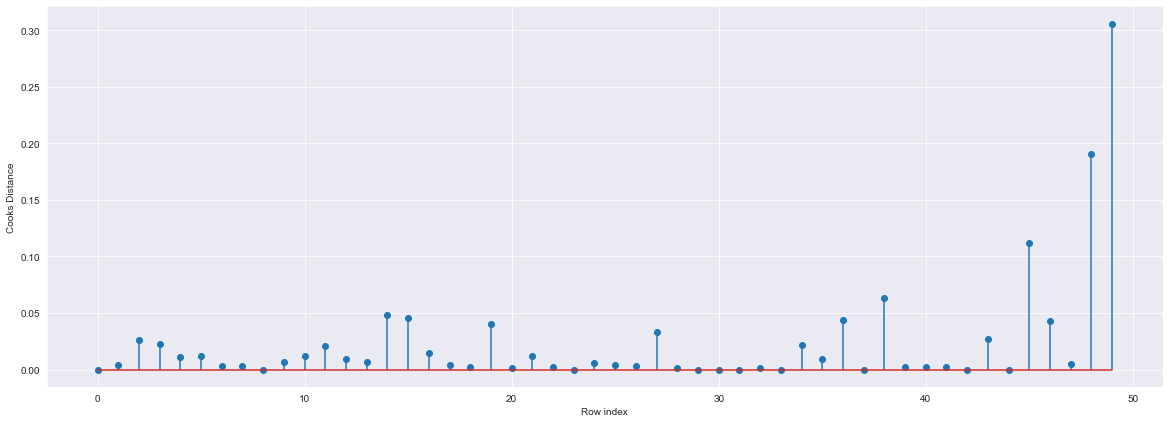

In [46]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data_cleaned)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [47]:
(np.argmax(c),np.max(c))

(49, 0.30602819546993487)

### High Influence points

In [48]:
k = data_cleaned.shape[1]
n = data_cleaned.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

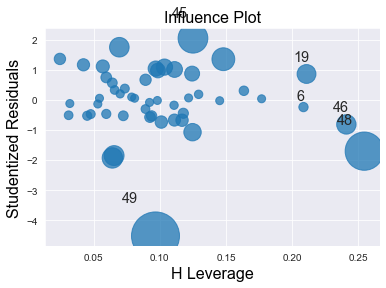

In [49]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_1)
plt.show()

**From the above plots, it is evident there are no influencers/outluers.**

## Build Final Model

In [50]:
Final_model = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State',data=data_cleaned).fit()

In [51]:
Final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           8.51e-29
Time:                        20:44:30   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
RD_Spend            0.8058      0.046     17.609      0.000       0.714       0.898
Administration     -0.0268      0.052     -0.520      0.606      -0.131       0.077
Marketing_Spend     0.0272      0.017      1.637      0.109      -0.006       0.061
State             -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
(Final_model.rsquared,Final_model.aic)

(0.9507462044842656, 1060.7712849964787)

In [53]:
Final_model_rsq = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State',data=data_cleaned).fit().rsquared
Final_model_rsq = (1/(1-Final_model_rsq))
Final_model_rsq

20.30300385034377